<a href="https://colab.research.google.com/github/YorkJong/Colab/blob/main/PytorchTutorial3_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[莫凡Pytorch教程（三）：Pytorch分类模型搭建](https://juejin.cn/post/7089937834659807262)

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100)
x = torch.cat((x0, x1), 0).float()  # FloatTensor
y = torch.cat((y0, y1), 0).long()   # LongTensor

print(x0.shape)
print(y0.shape)
print(x.shape)
print(y.shape)

torch.Size([100, 2])
torch.Size([100])
torch.Size([200, 2])
torch.Size([200])


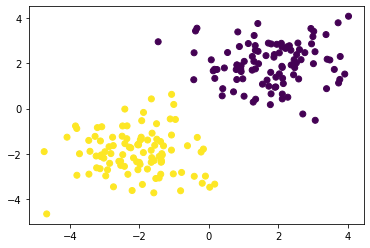

In [2]:
# Scatter with matplotlib
#plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy())
plt.scatter(x[:,0], x[:, 1], c=y)
#plt.savefig("./img/03_data.png")
plt.show()

# Scatter with Plotly
fig = go.Figure([
    go.Scatter(x=x0[:,0], y=x0[:,1], mode='markers', name='class 0'),
    go.Scatter(x=x1[:,0], y=x1[:,1], mode='markers', name='class 1'),
])
fig.update_layout(width=500, height=400, margin=dict(l=20, r=20, t=20, b=20))
fig.show()

fig = px.scatter(x=x[:,0], y=x[:,1], 
                 color=y.numpy().astype(str), labels={'color':'class'})
fig.update_layout(width=500, height=400, margin=dict(l=20, r=20, t=20, b=20))
fig.show()

In [3]:
class Net(torch.nn.Module):
    def __init__(self, n_feature: int, n_hidden: int, n_output: int):
        """
        Parameters
        ----------
        n_feature 
            represents the number of features
        n_hidden
            represents the number of neurons in the hidden layer
        n_output
            represents the number of output values
        """
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        """
        Parameters
        ----------
        x -- the input data
        """
        x = F.relu(self.hidden(x))  # x -> (n_sample, n_hidden)
        x = self.predict(x)         # x -> (n_sample, n_output)
        y = F.softmax(x, dim=1)     # y -> (n_sample, n_probability(=n_output)))
        return y

In [4]:
# Visualizing Functions

def show_class_mpl(x, y, class_):
    """Plot and show learning process with mplfinance.
    """
    plt.cla()
    plt.scatter(x, y, c=class_)
    plt.text(1.5, -4, f"Accuracy={accuracy:.2f}", 
             fontdict=dict(size=20, color='red'))
    plt.pause(0.1)


def show_class_plotly(x, y, class_):
    """Plot and show learning process with Plotly.
    """
    fig = px.scatter(x=x, y=y, color=class_, labels={'color':'class'})
    fig.update_layout(
        annotations=[
            dict(
                x=1.5, y=-4,
                text=f"Accuracy={accuracy:.2f}",
                font=dict(size=20, color='red'),
                showarrow=False
            )
        ],
        width=500, height=400,
        margin=dict(l=20, r=20, t=20, b=20),
    )
    fig.show()


Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


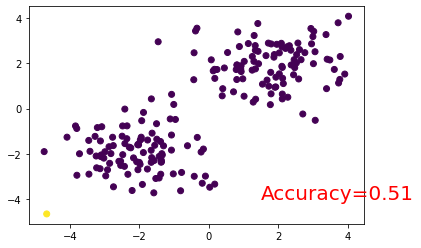

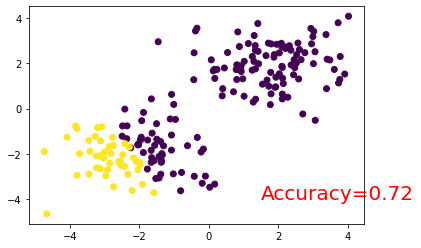

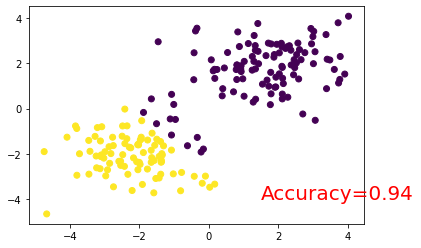

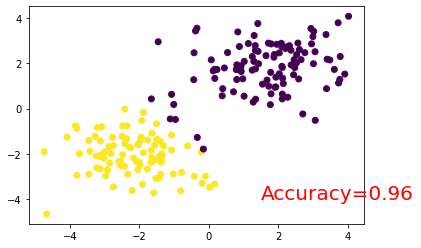

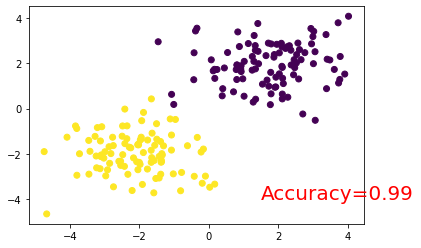

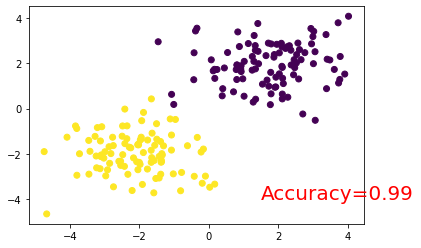

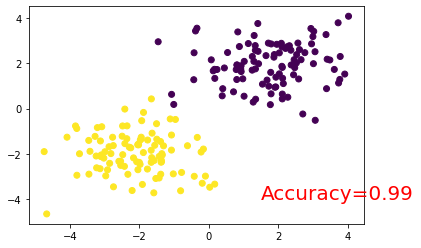

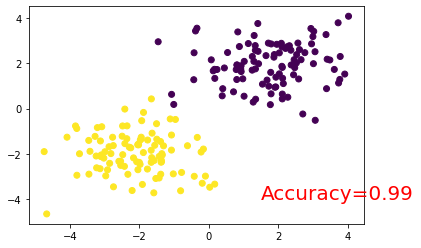

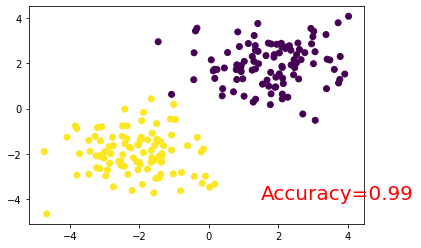

In [5]:
# Input is the training data of the entire batch, each data has 2 features,
# xy coordinates, and the output is a 200*2 vector, where [0, 1] represents an 
# output of 1 and [1, 0] represents an output of 0
net = Net(2, 10, 2)  
print(net)

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)

# Usually use CrossEntropy for classification problems
loss_func = torch.nn.CrossEntropyLoss()   

#plt.ion()
for step in range(42):
    # Forward
    out = net(x)        # out is the output activation value, shape=(200, 2)
    loss = loss_func(out, y)
    
    # First set all parameter gradients to zero (because this value is retained 
    # each time the gradient is calculated, not clearing it will result in 
    # incorrect results) 
    optimizer.zero_grad()   
                            
    # Perform backward propagation to calculate the gradients of all nodes in 
    # the computation graph                        
    loss.backward()     

    # After calculation, use the optimizer to optimize these gradients
    optimizer.step()    

    if step % 5 == 0:
        prediction = torch.argmax(out, 1)   # Output classify result
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        accuracy = float((pred_y == target_y).astype(int).sum()) / target_y.size
        show_class_mpl(x[:,0], x[:,1], pred_y)
        show_class_plotly(x[:,0], x[:,1], pred_y)
        
#plt.ioff()
plt.show()
